### Use shopping dataset and perform the following:
1. Implement Pre-processing functions
    - Check for NULL values in the dataset. If any NULL value is present then treat it accordingly.
    - extract only feature columns from the dataset.
2. Determine the number of clusters using dendogram. Use single linkage method.
3. Apply agglomerative clustering using single linkage method.
4. Form the clusters.
5. Evaluate the quality of clusters formed by agglomerative clustering.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1]:
data = pd.read_csv('D:\Dataset\shopping_data.csv')
data.head()

<IPython.core.display.Javascript object>

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


#### From above results no NULL value observed in dataset.

In [4]:
X = data.drop(['Spending Score (1-100)', 'CustomerID'], axis=1)
y = data['Spending Score (1-100)']

In [5]:
from sklearn.preprocessing import LabelEncoder

label_enc = LabelEncoder()

X['Genre'] = label_enc.fit_transform(X['Genre'].values)

In [6]:
X.head()

,Genre,Age,Annual Income (k$)
0,1,19,15
1,1,21,15
2,0,20,16
3,0,23,16
4,0,31,17


In [7]:
from scipy.cluster.hierarchy import linkage  

linked = linkage(X, 'single')

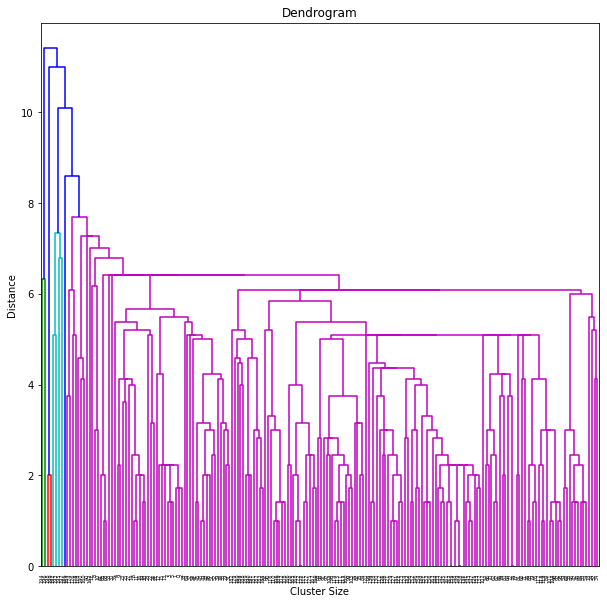

In [8]:
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(10,10))
dendrogram(linked, orientation='top')
plt.title("Dendrogram")
plt.xlabel("Cluster Size")
plt.ylabel("Distance")
plt.show()

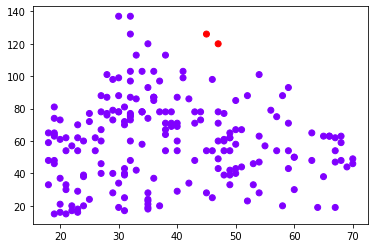

In [9]:
from sklearn.cluster import AgglomerativeClustering

# Clusters = 2
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='single')  
cluster_labels=cluster.fit_predict(X)  
plt.scatter(X.values[:,1],X.values[:,2], c=cluster_labels, cmap='rainbow')

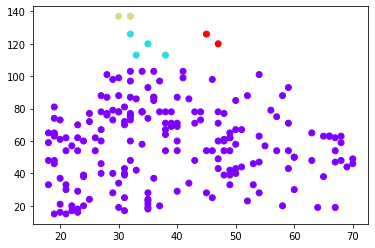

In [10]:
from sklearn.cluster import AgglomerativeClustering

# Clusters = 4
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='single')  
cluster_labels=cluster.fit_predict(X)  
plt.scatter(X.values[:,1],X.values[:,2], c=cluster_labels, cmap='rainbow')

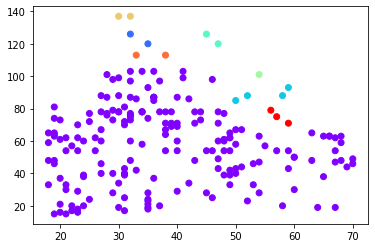

In [11]:
# Clusters = 8
cluster = AgglomerativeClustering(n_clusters=8, affinity='euclidean', linkage='single')  
cluster_labels=cluster.fit_predict(X)  
plt.scatter(X.values[:,1],X.values[:,2], c=cluster_labels, cmap='rainbow')

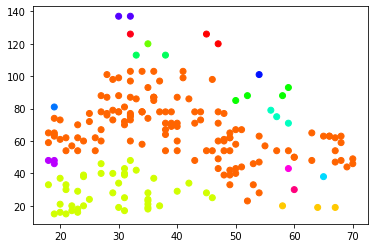

In [12]:
# Clusters = 16
cluster = AgglomerativeClustering(n_clusters=16, affinity='euclidean', linkage='single')  
cluster_labels=cluster.fit_predict(X)  
plt.scatter(X.values[:,1],X.values[:,2], c=cluster_labels, cmap='hsv')

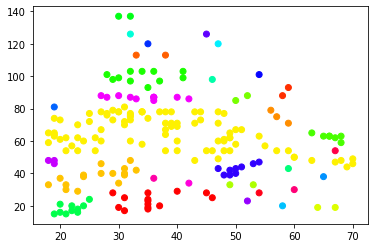

In [13]:
# Clusters = 32
cluster = AgglomerativeClustering(n_clusters=32, affinity='euclidean', linkage='single')  
cluster_labels=cluster.fit_predict(X)  
plt.scatter(X.values[:,1],X.values[:,2], c=cluster_labels, cmap='hsv')

### Evaluating cluster quality using Silhouette

In [14]:
from sklearn.metrics import silhouette_score 

k = range(16,50)
sil_scr = []

for x in k:
    ac = AgglomerativeClustering(n_clusters = x,  affinity='euclidean', linkage='single') 
    sil_scr.append(silhouette_score(X, ac.fit_predict(X)))

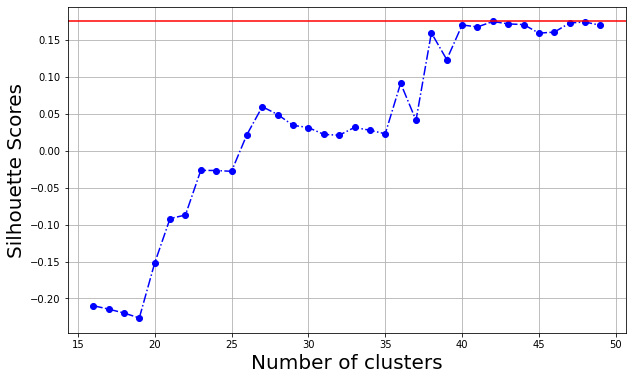

In [15]:
plt.figure(figsize=(10,6))
plt.plot(k, sil_scr, 'bo-.')
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('Silhouette Scores', fontsize = 20)
plt.axhline(np.max(sil_scr), color="red")
plt.grid()
plt.show()

In [16]:
print("Max Silhouette score of '{0}' at clusters = {1}".format(np.max(sil_scr), k[np.argmax(sil_scr)]))

Max Silhouette score of '0.17474069652429397' at clusters = 42
